

# Project: TMDB movie dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set I chose to analyse contains information regarding movies released over time such as 
Movie ID, 
Name, 
Cast, 
Year of release, 
Director, 
Genre, 
Budget, 
Revenue.
The information is stored in the file: tmdb-movies.csv.
This Notebook is designed to read the data, clean it and draw some conclusions on it based on some basic descriptive analytics.

In [181]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [182]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv', encoding='ISO-8859-1')
df.shape

(10866, 21)

There are 10,866 records with 21 attributes (columns).

In [183]:
#Show first lines in the dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Each Movie has 2 types of IDs and 2 types of Budgets and Revenues. I am going to assume the "_adj" ones are correct since there are no additional details.
The column heads don't state any currency for the financial information. I am going to assume they are in dollars.
Genres and Cast attributes contain ennumeration of values separated by character "|"


In [184]:
#Show first lines in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The file contains 10,866 lines of data regarding movies by release date. 
Each movie has 21 attributes, but some features are not filled in for all movies (such as imdb_id, cast,production_companies,homepage, keywords). Most of the information is either integer or float, but there are also some columns of object type.

### Data Cleaning: Examination of data quality, Removing/Replacing NULL values, Handling duplicates

In [185]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Look for duplicated id
df[df.duplicated(['id'], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [186]:
# Look for duplicated imdb_id
df[df.duplicated(['imdb_id'], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far AwayÃ¢â¬...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ãâ¦kerfeldt|Martin ""Axe"" Axenrot|Mart...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃÂ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0


Since "imdb_id" is missing for a number of movies, we can use id as the identifier for movies, next step being to remove id duplicates.

In [187]:
#Remove duplicated rows and check the new number of rows
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

Removing/Replacing NULL values

In [188]:
#Sorting the column names by the number of NULL values they contain
df.isnull().sum().sort_values(ascending=False)

homepage                7929
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

In [189]:
#Eliminate recordings without the information regarding the director
df.dropna(subset=['director'], inplace=True)
df.isnull().sum().sort_values(ascending=False)

homepage                7895
tagline                 2790
keywords                1465
production_companies    1007
cast                      70
genres                    21
imdb_id                    6
overview                   3
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
director                   0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

The rate of missing values for important information for the analysis of the data is very low, considering there are over 10,000 movies listed.

Since I will be working with the information regarding budget and revenue, I need to change the format of this information.

In [190]:
#Change data format for financial information from FLOAT to INTEGER
alter_format=['budget_adj', 'revenue_adj']
df[alter_format]=df[alter_format].applymap(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 21 columns):
id                      10821 non-null int64
imdb_id                 10815 non-null object
popularity              10821 non-null float64
budget                  10821 non-null int64
revenue                 10821 non-null int64
original_title          10821 non-null object
cast                    10751 non-null object
homepage                2926 non-null object
director                10821 non-null object
tagline                 8031 non-null object
keywords                9356 non-null object
overview                10818 non-null object
runtime                 10821 non-null int64
genres                  10800 non-null object
production_companies    9814 non-null object
release_date            10821 non-null object
vote_count              10821 non-null int64
vote_average            10821 non-null float64
release_year            10821 non-null int64
budget_adj              1

In [191]:
# Eliminate lines with zero budget and zero revenue in order to not distort profitability computations
df.drop(df.query("budget_adj==0").index, inplace=True)
df.drop(df.query("revenue_adj==0").index, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

The questions I am going to explore are the following:
>**1**: What are the movies with the highest all time BUDGETS?

>**2**: What are the movies with the highest all time REVENUE?

>**4**: What are the movies with the highest all time ROI (=revenue/budget)?

>**5**: What directors received the biggest budgets?

>**6**: What genres got the biggest budgets?

>**7**: What release years got the biggest budgets?

>**8**: What release years are the best in terms of ROI?

>**9**: What is the distribution of yearly ROI values?

>**10**: Did profits increase over the years?

>**11**: Did yearly ROI increase over the years?

>**12**: What is the most frequent movie genre produced?

>**13**: Who is the most casted actor?

>**14**: Does there appear to be a relationship between Budget and Profit?

Research Question 1: What are the movies with the highest all time BUDGETS?

In [192]:
#Sort dataframe by highest budget movies
df.sort_values(by='budget_adj', ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000,11087569
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃÂ©lope Cruz|Geoffrey Rush|Ian...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,368371256,990417500
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,315500574,1010653507
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,292050672,423020463
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,271692064,2506405735
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,271330494,936901700
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,260000000,591794936
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,257599886,1292632336
1389,767,tt0417741,5.076472,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,http://harrypotter.warnerbros.com/harrypottera...,David Yates,Dark Secrets Revealed,...,"As Harry begins his sixth year at Hogwarts, he...",153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,7/7/09,3220,7.3,2009,254100108,949276533
8089,9804,tt0114898,1.232098,175000000,264218220,Waterworld,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,NaN,Kevin Reynolds,Beyond the horizon lies the secret to a new be...,...,In a futuristic world where the polar ice caps...,135,Adventure|Action,Universal Pictures|Gordon Company|Davis Entert...,7/28/95,557,5.8,1995,250419201,378087518


It appears the "The Warrior's Way" would have the highest all time budget for a movie. However, at a simple Internet search, this seems not to be the case, with Pirates of the Caribbean being actually first.

Research Question 2: What are the movies with the highest all time REVENUE?

In [193]:
#Sort dataframe by highest revenue movies
df.sort_values(by='revenue_adj', ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,240886902,2827123750
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591,2789712242
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,271692064,2506405735
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,39289276,2167324901
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,28362748,1907005841
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,23726245,1791694309
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,...,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.6,1995,31481271,1583049536
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,29179444,1574814739
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,208943741,1443191435


Avatar seems to be the movie with the highest revenue, followed closely by Star Wars, each of the having around 2.8 bn $ in revenue.

Research Question 3: What are the movies with the highest all time PROFITS (=revenue-budget)?

In [194]:
# Compute profit and make it of integer format
df['Profit']=df['revenue_adj']-df['budget_adj']
alter_format=['Profit']
df[alter_format]=df[alter_format].applymap(np.int64)
#Sort desceding the dataframe by Profit, taking into account only movies with budgets above 1 mil $
df.query("budget_adj>1000000").sort_values(by='Profit', ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591,2789712242,2750136651
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,240886902,2827123750,2586236848
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,271692064,2506405735,2234713671
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,39289276,2167324901,2128035625
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,28362748,1907005841,1878643093
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,23726245,1791694309,1767968064
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,1718723210
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,...,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.6,1995,31481271,1583049536,1551568265
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,29179444,1574814739,1545635295
7309,1891,tt0080684,5.488441,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,124,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1/1/80,3954,8.0,1980,47628661,1424626187,1376997526


I filtered the movies to those with budgets above 1 mil $ as the file seems to have erroneous input for some movie budgets that are ridiculos in value. The '77 Star Wars movie is on top of the Profits list.

Research Question 4: What are the movies with the highest all time ROI (=revenue/budget)?

In [195]:
# Compute Return on Investment and make it of integer format
df['ROI per movie']=df['revenue_adj']/df['budget_adj']
alter_format=['ROI per movie']
df[alter_format]=df[alter_format].applymap(np.int64)
#Sort desceding the dataframe by Profit, taking into account only movies with budgets above 1 mil $
df.query("budget_adj>1000000").sort_values(by='ROI per movie', ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit,ROI per movie
7827,9659,tt0079501,2.012021,400000,100000000,Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,NaN,George Miller,The Maximum Force Of The Future,...,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions|Mad Max Films|Cross...,4/12/79,667,6.5,1979,1201821,300455400,299253579,250
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1002810,233989048,232986238,233
10606,838,tt0069704,0.684079,777000,115000000,American Graffiti,Richard Dreyfuss|Ron Howard|Paul Le Mat|Charle...,NaN,George Lucas,Where were you in '62?,...,Comedy|Drama,Lucasfilm|Universal Pictures|The Coppola Company,8/1/73,145,6.5,1973,3815970,564783351,560967381,148
7316,4488,tt0080761,1.246420,550000,59754601,Friday the 13th,Betsy Palmer|Adrienne King|Harry Crosby|Laurie...,NaN,Sean S. Cunningham,They were warned...They are doomed...And on Fr...,...,Horror,Paramount Pictures|Georgetown Productions Inc....,5/9/80,282,6.4,1980,1455320,158112870,156657550,108
10174,1366,tt0075148,2.389663,1100000,117235147,Rocky,Sylvester Stallone|Talia Shire|Burt Young|Carl...,NaN,John G. Avildsen,His whole life was a million-to-one shot.,...,Drama,United Artists,11/21/76,963,7.2,1976,4214867,449209681,444994814,106
10597,9461,tt0070034,0.993066,850000,90000000,Enter the Dragon,Bruce Lee|Jim Kelly|John Saxon|Ahna Capri|Sek Kin,NaN,Robert Clouse,Their deadly mission: to crack the forbidden i...,...,Crime|Thriller|Action,Golden Harvest Company|Concord Productions Inc...,8/17/73,279,7.0,1973,4174485,442004362,437829877,105
9808,36685,tt0073629,1.409947,1200000,112892319,The Rocky Horror Picture Show,Tim Curry|Susan Sarandon|Barry Bostwick|Richar...,http://www.rockyhorror.com/,Jim Sharman,A Different Set Of Jaws.,...,Comedy|Horror|Music|Science Fiction,20th Century Fox,8/14/75,332,7.1,1975,4862185,457419488,452557303,94
7011,176,tt0387564,1.309753,1200000,103911669,Saw,Cary Elwes|Danny Glover|Monica Potter|Michael ...,NaN,James Wan,Live or die. Make your choice.,...,Horror|Mystery|Crime,Twisted Pictures|Evolution Entertainment|Saw P...,10/1/04,1135,7.1,2004,1385334,119960348,118575014,86
10757,923,tt0077402,1.210531,650000,55000000,Dawn of the Dead,David Emge|Ken Foree|Scott H. Reiniger|Gaylen ...,NaN,George A. Romero,"When there's no more room in hell, the dead wi...",...,Horror,Laurel Group|Dawn Associates,9/2/78,306,7.2,1978,2172755,183848538,181675783,84
8897,150,tt0083511,1.161942,1000000,78868508,48 Hrs.,Nick Nolte|Eddie Murphy|Annette O'Toole|Frank ...,NaN,Walter Hill,One Cop. One Con. No Mercy.,...,Thriller|Action|Comedy|Crime|Drama,Paramount Pictures,12/7/82,171,6.1,1982,2259642,178214624,175954982,78


Out of all movies with budgets above 1 mil $, '79 Mad Max is no.1 in terms of ROI.

In [ ]:
Research Question 5: What directors received the biggest budgets

In [197]:
# Show data grouped by Director name in desceding order of their budgets
df.groupby('director').sum().sort_values(by='budget_adj', ascending=False).head(10)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit,ROI per movie
director,,,,,,,,,,,,
Steven Spielberg,492620,53.455764,1551500000,9018563772,3657,36284,184.0,53860,2076421540,15202446772,13126025232,291
Ridley Scott,739546,45.186253,1482000000,3584430808,2769,24508,136.4,41990,1736919343,4141847526,2404928183,39
Michael Bay,305181,22.254874,1360000000,4917208171,1614,17477,69.6,22052,1501996066,5460671953,3958675887,38
Peter Jackson,250289,48.204201,1326000000,6523244659,1668,31696,78.6,22041,1374356121,7019847812,5645491691,44
Tim Burton,252887,33.881859,1113000000,3665414624,1765,17149,105.4,31997,1328690202,4529285472,3200595270,49
Robert Zemeckis,435664,32.156851,1023000000,3869690869,1802,21187,100.9,29954,1319653074,5655648241,4335995167,75
Ron Howard,393156,23.789074,1064000000,3215232227,1797,10210,91.1,28006,1291276138,4011669225,2720393087,40
Gore Verbinski,122346,22.075374,1193000000,3548779679,1156,14371,57.3,18045,1269677139,3926129885,2656452746,23
Roland Emmerich,419305,16.825593,963500000,3393325574,1221,10807,54.0,18037,1105123284,4076980989,2971857705,26


Steven Spielberg and Ridley Scott got the biggest budgets.

Research Question 6: What genres got the biggest budgets?

In [198]:
# Show data grouped by Genre name in desceding order of their budgets
df.groupby('genres').sum().sort_values(by='budget_adj', ascending=False).head(10)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit,ROI per movie
genres,,,,,,,,,,,,
Comedy,11683554,229.520889,6160277872,18343356514,22982,81744,1373.9,466877,6908079820,21647995194,14739915374,1666
Drama,15075288,209.633605,5224798737,14274901536,29231,78232,1611.8,490788,6340490857,19662016014,13321525157,1070
Comedy|Romance,2684323,99.910291,2983991905,10806607205,10594,31926,606.7,206230,3494405435,13261347737,9766942302,522
Drama|Romance,4662330,92.471890,2063387020,6039639684,12435,31200,688.0,214291,2537109713,7705456698,5168346985,413
Comedy|Drama|Romance,2579765,74.567679,1958784775,6484718984,9751,25723,567.7,182028,2448196126,9357538529,6909342403,27426
Action|Thriller,1754415,62.944080,1770500000,4875600865,4206,27300,236.2,77994,2219369084,6445192792,4225823708,99
Comedy|Drama,3461010,67.929965,1639427000,4447373857,9345,24721,555.6,176214,1989076922,5967888923,3978812001,422
Adventure|Fantasy|Action,169808,56.751117,1776900000,7597483556,2042,41050,97.6,30027,1982081818,8539452235,6557370417,56
Animation|Family,583869,39.239378,1792500000,6572637559,1605,22332,120.0,36088,1926466496,7045538300,5119071804,55


Comedy and Drama were allocated the biggest budgets over time.

Research Question 7: What release years got the biggest budgets?

In [199]:
#Show data grouped by Year of release in desceding order of their budgets
df.groupby('release_year').sum().sort_values(by='budget_adj', ascending=False).head(10)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,Profit,ROI per movie
release_year,,,,,,,,,,,
2010,6407803,209.876482,8463138439,21804360476,18993,115480,1086.4,8463138439,21804360476,13341222037,664
2011,11325241,238.748525,8441550542,23408243869,21038,121141,1209.3,8183222482,22691905688,14508683206,27513
2013,22484636,251.708733,8567922778,24350666103,19645,182607,1116.0,8019861399,22793035544,14773174145,466
2004,1267970,163.915632,6663199308,16485705950,15715,72559,897.5,7692299675,19031847331,11339547656,1442
2009,3432678,199.152801,7537827919,21607132990,18618,103208,1053.0,7661451488,21961499262,14300047774,330
2005,1451675,162.862309,6830945941,16090398939,17884,64955,991.4,7627183395,17965948690,10338765295,516
2006,1325415,163.975433,6914218000,15640517999,18284,65303,1024.5,7478896272,16917865859,9438969587,468
2007,1510432,164.850026,6954567892,18640671559,17792,76625,1019.3,7313900472,19603808560,12289908088,13366
2012,12619538,222.580212,7587610525,24184456032,16937,160629,946.3,7206289626,22969048730,15762759104,554


2010 is the year when the biggest budgets were allocated to the movie industry.

Research Question 8: What release years are the best in terms of ROI?

In [200]:
#Compute ROI at release year level and then show the result in decreasing order of ROI at year of release level
df2=df.groupby('release_year').sum()
df2['ROI yearly']=df2['revenue_adj']/df2['budget_adj']
df2.sort_values(by='ROI yearly', ascending=False).head(20)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,Profit,ROI per movie,ROI yearly
release_year,,,,,,,,,,,,
1975,87941,12.325020,37100000,845307270,1074,5109,63.0,150322561,3425033889,3274711328,250,22.784563
1972,31951,9.563277,23664254,480900171,904,4676,56.0,123398689,2507683240,2384284551,613,20.321798
1973,97810,12.073784,57327000,1115013099,1343,3509,82.1,281542038,5476007256,5194465218,397,19.450052
1977,275203,24.078437,138850000,1882158485,2067,6981,120.1,499551887,6771594086,6272042199,1111,13.555337
1974,122014,11.895496,69585000,720167027,1586,4348,88.7,307724619,3184783033,2877058414,510,10.349458
1969,5002,4.611758,22844087,229707076,510,882,27.6,135791287,1365439547,1229648260,40,10.055428
1964,29052,9.644529,33935161,328613548,857,2404,48.8,238573252,2310241113,2071667861,70,9.683571
1971,74295,12.787049,40002000,376286710,1464,3607,87.1,215418560,2026377272,1810958712,162,9.406698
1961,110039,7.877177,38637000,337720188,1325,1914,66.2,281851548,2463621894,2181770346,84,8.740849


The '70s are the most profitable years based on ROI.

Research Question 9: What is the distribution of yearly ROI values?

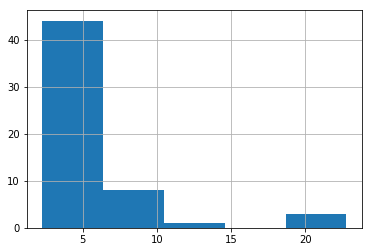

In [201]:
#Plot yearly ROI histogram
df2['ROI yearly'].hist(bins=5)


Most years brought ROIs below 5.

Research Question 10: Did profits increase over the years?

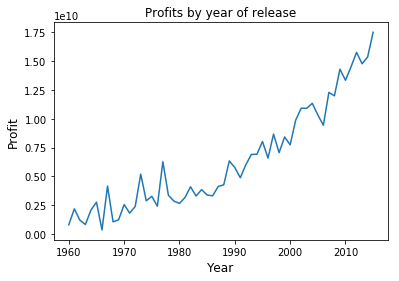

In [202]:
#Plot yearly profits line chart
plt.plot(df2['Profit'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Profit', fontsize = 12)
plt.title('Profits by year of release')
plt.figure(figsize=(12,6), dpi = 130)


The movie industry seems to have increased profits over the years, but this makes sense as larger amounts have been allocated to it and cosidering that old movies are still making money

Research Question 11: Did yearly ROI increase over the years?

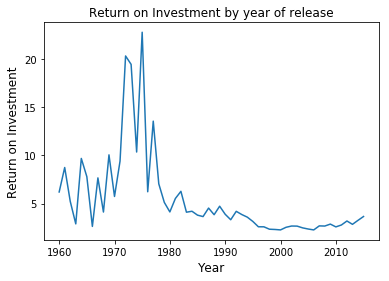

In [203]:
# Plot yearly ROI
plt.plot(df2['ROI yearly'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Return on Investment', fontsize = 12)
plt.title('Return on Investment by year of release')
plt.figure(figsize=(12,6), dpi = 130)

Looking at the chart above it seems that the '70s have the largest ROI. This can be true if we consider that the copy rights for movies released in that period are still in place and some of the movies are very popular today as well.

Research Question 12: What is the most frequent movie genre produced?

In [204]:
# Gather all the strings in a column and separate them by the common separator "|" and 
#then count the appearance of each substring
def frequency_func(column):
    all_array = df[column].str.cat(sep = '|')
    all_array = pd.Series(all_array.split('|'))
    all_array_freq = all_array.value_counts(ascending = False)
    return all_array_freq

In [205]:
#Call frequency function for movie Genres
frequency_func('genres')

Drama              1755
Comedy             1356
Thriller           1204
Action             1085
Adventure           749
Romance             665
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              12
TV Movie              1
dtype: int64

Most common movie genre is Drama, followed by Comedy.

Research Question 13: Who is the most casted actor?

In [206]:
#Call frequency function for movie Cast column
frequency_func('cast')

Robert De Niro              52
Bruce Willis                46
Samuel L. Jackson           44
Nicolas Cage                43
Matt Damon                  36
Johnny Depp                 35
Brad Pitt                   34
Harrison Ford               34
Tom Hanks                   34
Morgan Freeman              34
Sylvester Stallone          34
Tom Cruise                  33
Denzel Washington           32
Eddie Murphy                32
Liam Neeson                 31
Owen Wilson                 30
Julianne Moore              30
Meryl Streep                29
Mark Wahlberg               29
Arnold Schwarzenegger       29
Willem Dafoe                29
Robin Williams              29
Gene Hackman                29
Ben Affleck                 28
Cameron Diaz                28
Keanu Reeves                28
Dennis Quaid                28
Jim Carrey                  28
Ewan McGregor               28
Nicole Kidman               27
                            ..
Seth Meyers                  1
Paul Dra

Robert De Niro and Bruce Willis are the most casted actors.

Research Question 14: Does there appear to be a relationship between Budget and Profit?

Text(0,0.5,'Profits')

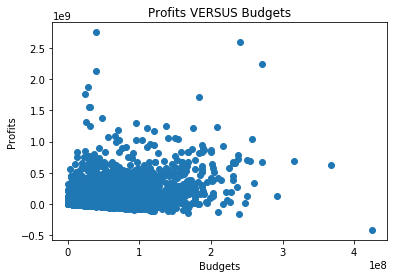

In [207]:
#Plot scatterplot with Profits on Y and Budgets on X
plt.scatter(df['budget_adj'], df['Profit'])
plt.title("Profits VERSUS Budgets")
plt.xlabel("Budgets")
plt.ylabel("Profits")

There appears to be positive correlation between the two, but more in depth analysis is required.

<a id='conclusions'></a>
## Conclusions

The findings in the report above must taken into account with the following disclaimers:
- I had to make some assumptions about currency (dollars), what column had the right values (the "adj" ones)
- There is no specification if the numbers account for inflation or not
- The data appears to contain only american movies and there is no statement if the information is comprehensive or not
- The are some obvious mistakes in the input data (movies with ridiculously low/high budgets) and only those with missing information or duplicates have been corrected.

The main findings related to the movies dataset are the following:

- It appears the "The Warrior's Way" would have the highest all time budget for a movie. However, at a simple Internet search, this seems not to be the case, with Pirates of the Caribbean being actually first.

- Avatar seems to be the movie with the highest revenue, followed closely by Star Wars, each of the having around 2.8 bn $ in revenue.

- The '77 Star Wars movie is on top of the Profits list.

- Out of all movies with budgets above 1 mil $, '79 Mad Max is no.1 in terms of ROI.

- Steven Spielberg and Ridley Scott got the biggest budgets.

- Comedy and Drama were allocated the biggest budgets over time.

- 2010 is the year when the biggest budgets were allocated to the movie industry.

- The '70s are the most profitable years based on ROI.

- Most years brought ROIs below 5.

- The movie industry seems to have increased profits over the years, but this makes sense as larger amounts have been allocated to it and cosidering that old movies are still making money.

- Robert De Niro and Bruce Willis are the most casted actors.

- Budget and Profit appear to be positively correlated for this particular industry.